python_ml_regression

## 회귀
- 수치예측
- 통계 관점에서의 회귀
  + 해석이 매우 중요 / 분포 / 데이터가 어떤 문포로 이루어져 있는가?를 파악
  + 가설검정 추론
    - 카카오 주식 하락을 시키는 여러가지 요인
- 머신러닝 관점에서의 회귀
  + 수치 예측
  + 오차 (Error) = 실제 관측치 - 예측치
  + 좋은 모델을 선정 == 오차가 작은 것

In [1]:
import numpy as np

#농어 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
#농어 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## _데이터 시각화_



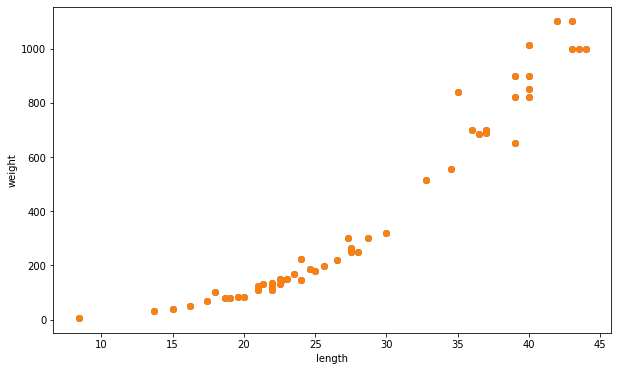

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(perch_length, perch_weight)
ax.scatter(perch_length, perch_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

## 세트 분리
- 훈련 세트, 테스트 세트 분리
- scikit-learn, train_test_split

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

#차원 확인 메서드
train_input.shape, test_input.shape, train_target.shape, test_target.shape
train_input.ndim, test_input.ndim, train_target.ndim, test_target.ndim

(1, 1, 1, 1)

## reshape

In [4]:
# reshape 배열의 사이즈를 맘대로 바꿀 수 있음
# 1차원 배열 --> 2차원 또는 3차원 배열
# 최대공약수 & 최소공배수
test_array = np.array([1,2,3,4,5,6,7,8])
temp_arr = test_array.reshape(-1,2,2)# 첫번째 값이 이상해도 알아서 나옴
temp_arr

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [5]:
#1차원 배열을 2차원으로 바꿔줌
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

### 모델 만들기

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# K-최근접 이웃 회귀모델
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결정계수
- 신뢰도. (모형을 99.2% 믿을만하다~)

In [7]:
knr.score(test_input, test_target)

0.992809406101064

- 평가지표(sklearn 함수로 존재함)
  + 절댓값 오차

In [8]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듬
test_prediction = knr.predict(test_input)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [9]:
import pandas as pd

result_df = pd.DataFrame({
    "예측" : test_prediction,
    "기존" : test_target
})

result_df

,예측,기존
0,60.0,5.9
1,79.6,100.0
2,248.0,250.0
3,122.0,130.0
4,136.0,130.0
5,847.0,820.0
6,311.4,320.0
7,183.4,188.0
8,847.0,900.0
9,113.0,125.0


## 19g의 의미
- 예측이 평균적으로 19g 정도 다르다

In [10]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과대적합 vs 과소적합
- 내신(훈련) : 내신 1등
- 모의고사(검증) : 모의고사 중간
- 수능(테스트) : 모의고사보다 더 못봄

---
- 내신(훈련) : 내신 5등
- 모의고사(검증) : 모의고사 상위권
- 수능(테스트) : 수능 중상위


In [11]:
print(knr.score(train_input, train_target))

0.9698823289099254


과소적합 Case(훈련이 덜 됨)
- 훈련 데이터 평가 : 0.97
- 테스트 데이터 평가 : 0.99
- 보통은 train이 더 높지만, 데이터가 작기 때문에 이런 결과

# 파라미터 조정

In [12]:
knr.n_neighbors = 3
#모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [13]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 왜 다른 모형이 필요한가?
- 머신러닝 알고리즘의 종류는 수백가지

In [14]:
print(knr.predict([[50]]))
print(knr.predict([[500]]))

[1033.33333333]
[1033.33333333]


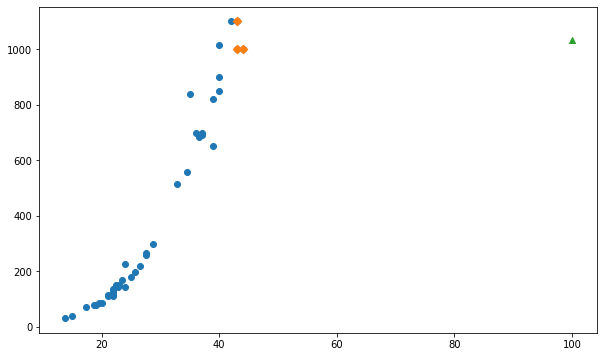

In [15]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구해보자
distances, indexes = knr.kneighbors([[100]])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#50cm 농어 데이터
ax.scatter(100,1033,marker='^')

plt.show()

## 선형회귀
* 직선을 긋는다
  - 주어진 데이터 분포에서 가장 적은 오차(군집도가 높은)를 표현할 수 있는 직선을 긋는다.

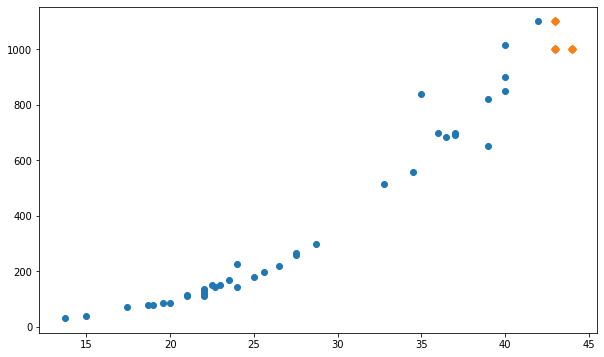

In [16]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[100]])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')


plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [18]:
lr.predict([[50]])

array([1241.83860323])

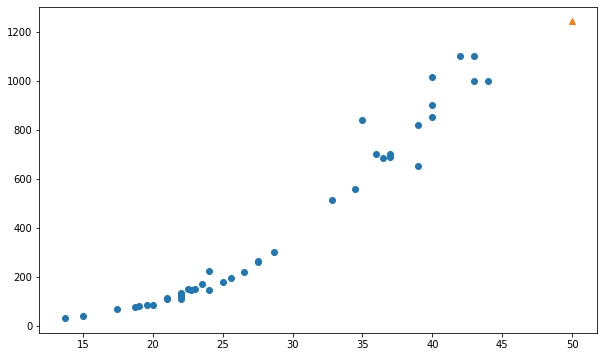

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input, train_target)
# ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')
ax.scatter(50,1241,marker='^')

plt.show()

- y = ax + b
  + a = 기울기
  + b = 상수

In [20]:
      # 기울기 # 상수
      # 계수   # 절편
      # 가중치
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


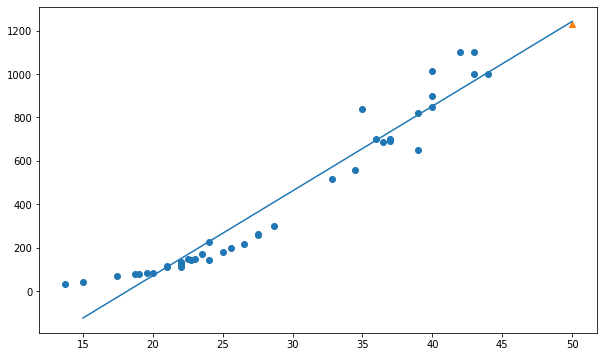

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input, train_target)

# 50cm 농어 데이터
ax.scatter(50,1231,marker='^')

# 기울기
                # x값 * 기울기 + 상수
ax.plot([15,50],[15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.show()

## 직선의 문제
- 15부분 음수가 나옴

## 다항회귀(2차방정식)
- y=ax^2 + bx + c
- 무게 = a길이^2 + b길이
- 19.6 * 19.6 --> 384.16

In [24]:
#길이와 제곱
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 농어 50cm 예측
print(lr.predict([[50**2,50]]))
print(lr.predict([[10**2,10]]))

[1573.98423528]
[1.90417193]


In [26]:
#기울기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 x 길이^2 - 21.6 * 길이 + 116.05

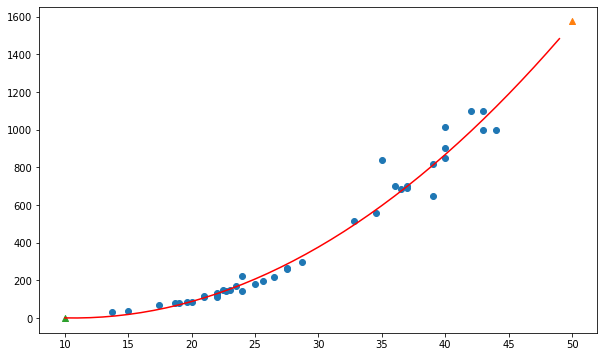

In [36]:
fig, ax = plt.subplots(figsize=(10,6))

# 구간별 직선을 그리자.
point = np.arange(10,50)

# 훈련 세트의 산점도
ax.scatter(train_input, train_target)

# 2차 방정식 그래프
ax.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05, color='red')

ax.scatter(50,1574,marker='^')
ax.scatter(10,1.9,marker='^')

plt.show()

In [39]:
lr.score(train_poly, train_target)

0.9706807451768623

## 특성 공학과 규제
- 데이터의 특성 2가지만 가지고 활용
  + 길이와 무게
- 부동산 가격 결정하는 여러 요소들
  + 브랜드 / 역세권/ 지하철 / 등등

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://bit.ly/perch_csv_data')
# 농어의 길이, 높이, 너비
perch_full = df.to_numpy()

# 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## 세트 분리


In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 3), (14, 3), (42,), (14,))

## Scikit-Learn Transformer
- 데이터의 특성을 변환 시키는 여러 함수들


In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

# 2와 3으로 구성된 샘플적용
poly.fit([[2,3]])

print(poly.transform([[2,3]]))

print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[1. 2. 3. 4. 6. 9.]]


In [46]:
poly = PolynomialFeatures(include_bias = False)

poly.fit([[2,3]])

print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


무게 = a 길이 + b 높이 + c 두께 + d(상수)

In [47]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [51]:
train_poly[:1]

array([[ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416]])

In [49]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [52]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [53]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
#사용자 정의 함수 또는 반복문
for idx in range(2,5):
  poly = PolynomialFeatures(degree = idx ,include_bias = False)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  test_poly = poly.transform(test_input)
  lr = LinearRegression()
  lr.fit(train_poly, train_target)

  print("Degree :", idx)
  print(lr.score(train_poly, train_target))
  print(lr.score(test_poly, test_target))
  print('-'*30)

## 규제 - Regularization
- 훈련 세트를 과도하게 학습하지 않도록 하는게 목표
- 선형회귀 : 기울기의 크기를 조절
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 표준점수
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811],
       [-1.11650891, -0.98919391, -0.97371419, -1.02065999, -0.9714645 ,
        -0.97031097, -0.92689165, -0.92331614, -0.91379551],
       [-1.26544951, -1.20148364, -1.07678447, -1.11008743, -1.0794873 ,
        -1.04481394, -1.04749571, -1.01503633, -0.97401432],
       [ 0.86554673,  0.89357239,  1.09914363,  0.78258063,  0.79878122,
         0.93990033,  0.80045116,  0.93459078,  1.05668676]])

## 릿지 회귀, 라쏘회귀
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 : 계소의 절댓값을 기준으로 규제를 적용

## 릿지 회귀
- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9857915060511934
0.9835057194929057


## 최적의 규제의 강도를 찾아보자!
- 하이퍼파라미터 튜닝
- 릿지에서는 alpha값 조정을 통해 계수를 규제한다.
  - alpha값이 크면 규제강도는 강해짐
  - alpha값이 작으면 규제강도는 약해짐

[0.9897531865574959, 0.9893635642716538, 0.9889354346720892, 0.9857915060511934, 0.9776772831444959, 0.9325445748770714, 0.45799929669378614]
[0.9832623296779315, 0.983937539450387, 0.9856564835209134, 0.9835057194929057, 0.9660894961121519, 0.9399126744040402, 0.4534666148372245]


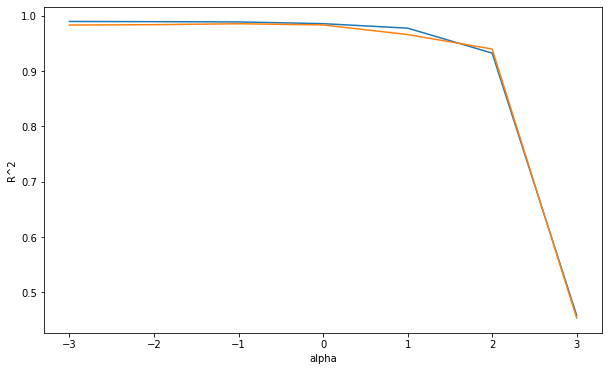

In [69]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_values:
  # 릿지 모델
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
print(train_score)
print(test_score)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log10(alpha_values), train_score)
ax.plot(np.log10(alpha_values), test_score)
ax.set_xlabel('alpha')
ax.set_ylabel('R^2') # 결정계수

plt.show()

- 가장 좋은 결과를 주는 규제의 강도를 찾은 것
- --> 최종 모델이 됨.

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209134


## Lasso
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.986591255464559
0.9846056618190413


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.686e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[0.9887077130101652, 0.988705782781804, 0.9889737410220835, 0.986591255464559, 0.9827254657543517, 0.9021189412769901]
[0.9826276478073225, 0.9826606499192427, 0.9845845445966906, 0.9846056618190413, 0.9778291802263332, 0.9064571064580721]


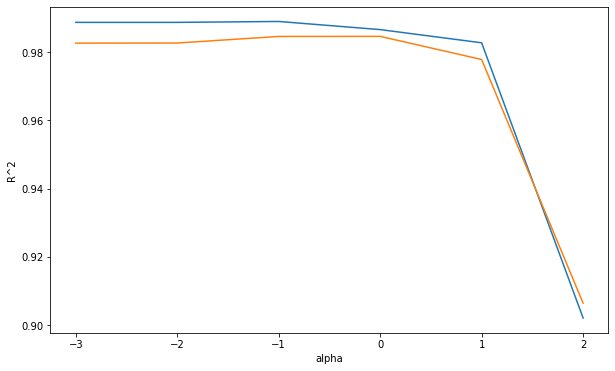

In [79]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_values = [0.001, 0.01, 0.1, 1,10, 100]
for alpha in alpha_values:
  # 라쏘 모델
  lasso = Lasso(alpha =alpha)
  lasso.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
print(train_score)
print(test_score)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log10(alpha_values), train_score)
ax.plot(np.log10(alpha_values), test_score)
ax.set_xlabel('alpha') # 라쏘회귀 규제의 강도
ax.set_ylabel('R^2') # 결정계수

plt.show()